
```
Kmeans
Points
Synthetic Data generation                      1
k-means implementation                        12
fit and plot with default seed                 4
fit and plot with seed=2                       4
compare results from different seeds           5
k-means++                                      8
fit and plot with default seed                 4
fit and plot with seed=2                       4
compare results from different seeds           5
Testing on an RGB image                        8
comparing all results from
different methods and seeds                    4

Hierarchical
Load Mall Customer dataset                     1
Implement Ward distance                        7
Implement hierachical clustering              25
Plot clusters and label customer types         8
Total                                        100
```


In [1]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
#you can use Python’s imaging library (PIL)
from PIL import Image
from IPython.display import display
# or you can use opencv ## conda install -c conda-forge opencv
import cv2
import scipy.cluster.hierarchy as sch #you only for sch.dendrogram
from sklearn.metrics import pairwise_distances_argmin


In [83]:
X, clusters = make_blobs(n_samples=300, centers=4, cluster_std=0.6,random_state=4)

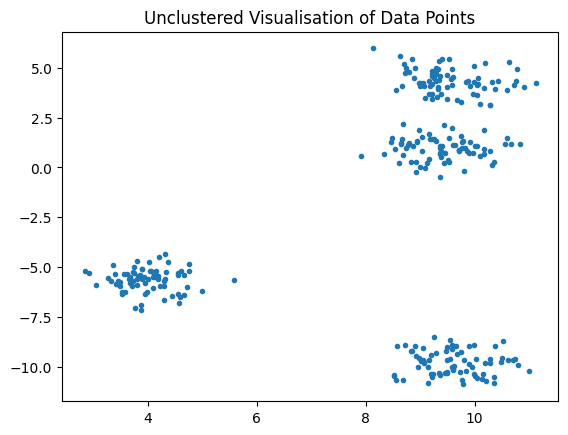

In [84]:
#unclustered data visualisation
x = X[:,0]
y = X[:,1]
plt.plot(x, y, '.')
plt.title('Unclustered Visualisation of Data Points')
plt.show()

In [85]:
def kmeans_clustering(X, k, kmeansplus ,seed, tolerance=0.001, max_iterations=200):

    data_dim = X.shape[1]
    # Initialize centroids using K-means++ method
    if (kmeansplus):
      if(seed):
        np.random.seed(2)
        centroids = initialize_kmeans_plusplus(X, k)
      else:
        centroids = initialize_kmeans_plusplus(X, k)
    else:
      if(seed):
        np.random.seed(2)
        centroids_list = []
        for _ in range (k):
          centroid = np.random.rand(data_dim)
          centroids_list.append(centroid)
        centroids = np.array(centroids_list)
      else:
        centroids_list = []
        for _ in range (k):
          centroid = np.random.rand(data_dim)
          centroids_list.append(centroid)
        centroids = np.array(centroids_list)

    iteration = 0
    converged = False

    while not converged and iteration < max_iterations:
        iteration += 1
        old_centroids = np.copy(centroids)

        # Step 1: Assign points to the nearest centroid
        labels = pairwise_distances_argmin(X, centroids)

        # Step 2: Update centroids to be the mean of the points assigned to them
        for i in range(k):  # Make sure to iterate over all k clusters
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                centroids[i] = points_in_cluster.mean(axis=0)

        # Check for convergence
        differences = np.linalg.norm(centroids - old_centroids, axis=1)
        if np.max(differences) < tolerance:
            converged = True

    if converged:
        print(f"Converged after {iteration} iterations")
    else:
        print(f"Did not converge within {max_iterations} iterations")

    return centroids, labels


In [86]:
def plot_clusters(X, centroids, labels):
    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
    plt.show()

Converged after 3 iterations


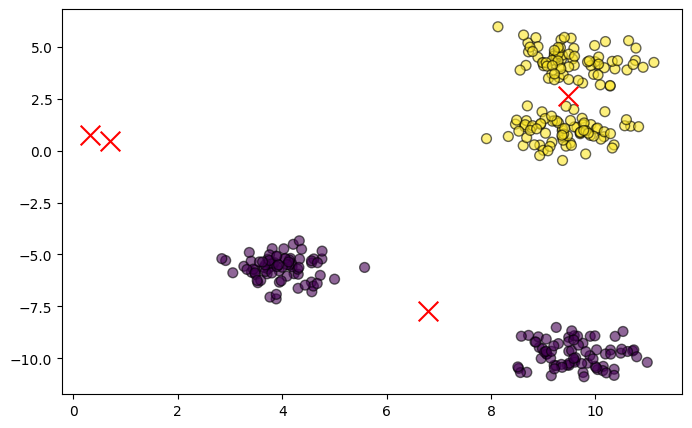

In [94]:
# normal kmeans without seed

kmeansplusplus = False
seed = False

centroids, labels = kmeans_clustering(X, 4, kmeansplusplus, seed)

plot_clusters(X, centroids, labels)

Converged after 2 iterations


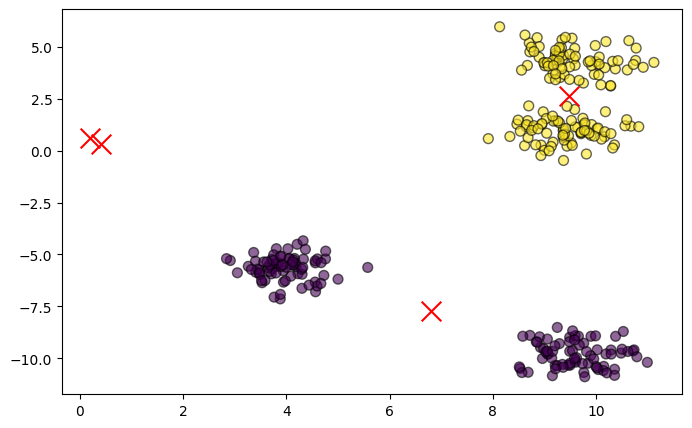

In [96]:
# normal kmeans with seed

kmeansplusplus = False
seed = True

centroids, labels = kmeans_clustering(X, 4, kmeansplusplus, seed)

plot_clusters(X, centroids, labels)


In [97]:
# k means plus plus
def initialize_kmeans_plusplus(X, k):

    n_samples, _ = X.shape

    # Step 1: Randomly choose the first centroid from the data points
    centroids = [X[np.random.randint(0, n_samples)]]

    for _ in range(1, k):
        # Compute squared distances from each point to the nearest centroid
        distances = np.min([np.sum((X - centroid)**2, axis=1) for centroid in centroids], axis=0)

        # Compute the probabilities for each point
        probabilities = distances / np.sum(distances)

        # Choose the next centroid
        centroid_index = np.random.choice(n_samples, p=probabilities)
        centroids.append(X[centroid_index])

    return np.array(centroids)


Converged after 2 iterations


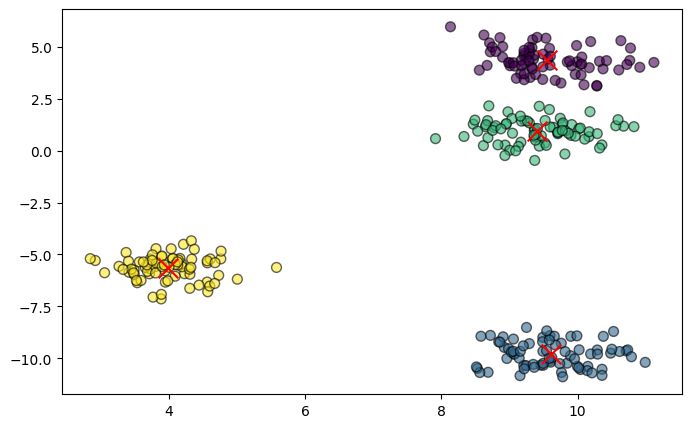

In [101]:
# K-means++ without seed

kmeansplusplus = True
seed = False

centroids, labels = kmeans_clustering(X, 4, kmeansplusplus, seed)

plot_clusters(X, centroids, labels)

Converged after 2 iterations


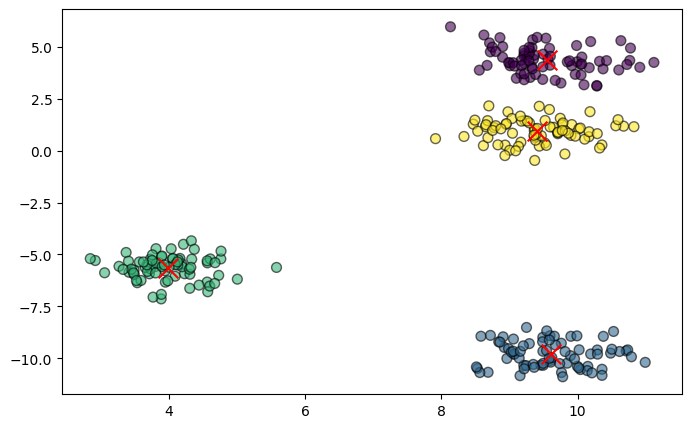

In [103]:
# K-means++ with seed

kmeansplusplus = True
seed = True

centroids, labels = kmeans_clustering(X, 4, kmeansplusplus, seed)

plot_clusters(X, centroids, labels)

In [104]:
# clustering of image
image_path = 'drive/MyDrive/data/cropped.jpg'
image = cv2.imread(image_path)

flattened_image = image.reshape((-1, 3))


In [105]:
#K-means without seed
kmeansplusplus = False
seed = False
k = 6

centroids, labels = kmeans_clustering(flattened_image, k, kmeansplusplus, seed)

clustered_image_flat = np.array([centroids[label] for label in labels])

clustered_image = clustered_image_flat.reshape(image.shape)

# Assuming you want to display or save the clustered image using cv2
cv2.imwrite('clustered_image1.jpg', clustered_image)

Converged after 105 iterations


True

In [106]:
#K-means with seed
kmeansplusplus = False
seed = True
k = 6

centroids, labels = kmeans_clustering(flattened_image, k, kmeansplusplus, seed)

clustered_image_flat = np.array([centroids[label] for label in labels])

clustered_image = clustered_image_flat.reshape(image.shape)

# Assuming you want to display or save the clustered image using cv2
cv2.imwrite('clustered_image2.jpg', clustered_image)

Converged after 105 iterations


True

In [107]:
#K-means++ without seed
kmeansplusplus = True
seed = False
k = 6


centroids, labels = kmeans_clustering(flattened_image, k, kmeansplusplus, seed)

clustered_image_flat = np.array([centroids[label] for label in labels])

clustered_image = clustered_image_flat.reshape(image.shape)

# Assuming you want to display or save the clustered image using cv2
cv2.imwrite('clustered_image3.jpg', clustered_image)

Converged after 20 iterations


True

In [108]:
#K-means++ with seed
kmeansplusplus = True
seed = True
k = 6

centroids, labels = kmeans_clustering(flattened_image, k, kmeansplusplus, seed)

clustered_image_flat = np.array([centroids[label] for label in labels])

clustered_image = clustered_image_flat.reshape(image.shape)

# Assuming you want to display or save the clustered image using cv2
cv2.imwrite('clustered_image4.jpg', clustered_image)

Converged after 13 iterations


True

Effect of Seed Specification:

When a specific seed (set to 2) is used, the initialization of centroids remains consistent across different runs. This consistency leads to identical clustering outcomes for repeated executions, as the initial positions of centroids don't change.

On the contrary, when the seed is not specified (using the default setting), the centroids are initialized to new, random positions in each run. As a result, the clustering outcome may vary, demonstrating different groupings each time due to the altered starting conditions.


Comparison between K-means and K-means++:

K-means Clustering: The normal K-means algorithm selects initial centroids randomly from the dataset, which results in less optimal clustering. In some cases, centroids might not be positioned near any actual data point, leading to suboptimal grouping. This randomness can cause the algorithm to converge to local minima, depending on where the initial centroids are placed.

K-means++ Clustering: The K-means++ algorithm improves upon the initialization step of K-means. It carefully chooses the initial centroids so as to spread them out across the data space. This strategic placement of centroids at the outset is designed to improve clustering quality and convergence time. As a result, K-means++ tends to produce better clustering by ensuring centroids start closer to the optimal positions, thus mitigating the issue of centroids not aligning with data points.

In [81]:
# agglomerative hierarchical clustering
dataset = pd.read_csv('drive/MyDrive/data/Mall_Customers.csv')
dataset['Gender'] = dataset['Gender'].replace(['Male', 'Female'], [0, 1])


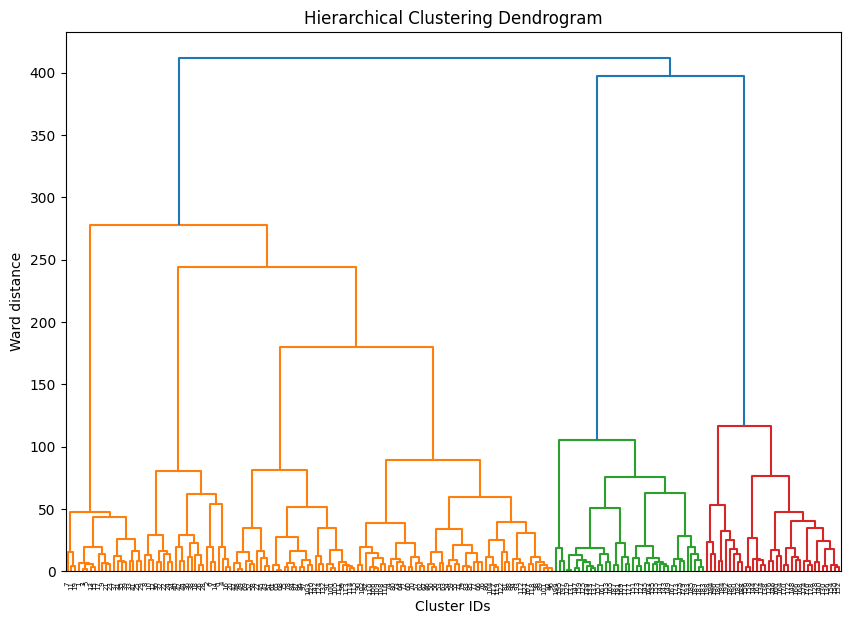

In [82]:
def euc_dist(a, b):
    return np.sqrt(np.sum(np.fromiter(((a_i - b_i)**2 for a_i, b_i in zip(a, b)), dtype=float)))

def hierarchical_clustering(data):

    # Initialize clusters and a matrix for dendrogram
    clusters = {i: [i] for i in range(len(data))}
    current_cluster_id = len(data)
    dendrogram_matrix = []

    while len(clusters) > 1:
        # Find the two closest clusters based on Ward distance
        min_distance = np.inf
        for i in clusters:
            for j in clusters:
                if i < j:  # Ensure we don't calculate the distance of a cluster with itself
                    # Calculate the Ward distance using the custom Euclidean distance function
                    distance = ward_distance(clusters[i], clusters[j], data)
                    if distance < min_distance:
                        min_distance = distance
                        to_merge = (i, j)

        # Merge the clusters
        new_cluster = clusters[to_merge[0]] + clusters[to_merge[1]]
        dendrogram_matrix.append([to_merge[0], to_merge[1], min_distance, 0])  # <-- Fourth column as zeros
        del clusters[to_merge[0]]
        del clusters[to_merge[1]]
        clusters[current_cluster_id] = new_cluster
        current_cluster_id += 1

    return dendrogram_matrix


def ward_distance(cluster_a, cluster_b, all_points):
    """
    Calculate Ward distance between two clusters using custom Euclidean distance function.
    """
    combined_cluster = np.vstack((all_points[cluster_a], all_points[cluster_b]))
    centroid_a = np.mean(all_points[cluster_a], axis=0)
    centroid_b = np.mean(all_points[cluster_b], axis=0)
    centroid_combined = np.mean(combined_cluster, axis=0)

    sq_dist_a = sum(euc_dist(point, centroid_a)**2 for point in all_points[cluster_a])
    sq_dist_b = sum(euc_dist(point, centroid_b)**2 for point in all_points[cluster_b])
    sq_dist_combined = sum(euc_dist(point, centroid_combined)**2 for point in combined_cluster)

    return np.sqrt(2*(sq_dist_combined - sq_dist_a - sq_dist_b))

clustering_data = dataset.iloc[:, 1:].values


# Now you can use `clustering_data_standardized` for hierarchical clustering
dendrogram_matrix = hierarchical_clustering(clustering_data)


# Plot the dendrogram again
plt.figure(figsize=(10, 7))
sch.dendrogram(dendrogram_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster IDs")
plt.ylabel("Ward distance")
plt.show()